In [1]:
import numpy as np

In [2]:
data_path = '/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/Richards_2017-10-31.tar'
spike_times = np.load(data_path+'/'+'spikes.times.npy')*1000 # Unbinned spike times in ms
clusters_annotation = np.load(data_path+'/'+'clusters._phy_annotation.npy')
spike_clusters = np.load(data_path+'/'+'spikes.clusters.npy')

In [5]:
def get_good_cells(fdirpath): #
    # location in brain of each neuron
    brain_loc = os.path.join(fdirpath, "channels.brainLocation.tsv")

    good_cells = (np.load(os.path.join(fdirpath, "clusters._phy_annotation.npy")) >= 2 ).flatten()
    clust_channel = np.load(os.path.join(fdirpath, "clusters.peakChannel.npy")).astype(int) - 1
    br = []
    with open(brain_loc, 'r') as tsv:
        tsvin = csv.reader(tsv, delimiter="\t")
        k=0
        for row in tsvin:
            if k>0:
                br.append(row[-1])
            k+=1
    br = np.array(br)
    good_cells = np.logical_and(good_cells, clust_channel.flatten()<len(br))
    brain_region = br[clust_channel[:,0]]


    return good_cells, brain_region, br

def bin_spikes(spike_times,spike_clusters,clusters_annotation, bin_size = 10):

    # Using clusters._phy_annotation.npy obtain valid clusters (i.e. >= 2)
    # valid_clusters_idx = np.array(np.where(clusters_annotation>=2))[0]

    spike_time_cells = np.empty(len(clusters_annotation), dtype=object) # Initalise empty object
    for i in (np.arange(len(np.unique(spike_clusters)))):
      # Create a spike time arrays, where each array in the array is a spike time of a cell
      spike_time_cells[i] = spike_times[(np.where(spike_clusters == i)[0])]

    # Bin spike times into 10ms intervals
    spike_time_binned = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object
    sum_spikes = np.empty(len(np.unique(spike_clusters)), dtype=object) # Initalise empty object

    for cell_num in np.arange(len(spike_time_cells)):
        spike_time_hist = np.histogram(spike_time_cells[cell_num],bins = np.arange(0,np.floor(spike_time_cells[cell_num][-1]),bin_size))
        spike_time_binned[cell_num] = spike_time_hist[0]
        sum_spikes[cell_num] = np.sum(spike_time_binned[cell_num])

    cell_spikes_max = np.argmax(sum_spikes) # cell with the maximum number of spikes for plotting purposes

    # Spike_time_binned returns binned spikes sorted into cells
    # Spike_time_cells returns UNbinned spikes sorted into cells
    # cell_spikes_max returns a single cell index that has the max number of spikes (i.e most active cell)
    return spike_time_binned, spike_time_cells, cell_spikes_max

In [6]:
spikes,spike_time_cells, cell_spikes_max=bin_spikes(spike_times,spike_clusters,clusters_annotation, bin_size = 10)

In [24]:
lst=[]
for j in range(0,778):
    lst.append(list(spikes[j][:].flatten()))
spikes=np.array(lst)

In [25]:
print(spikes.shape)

(778, 1000)


In [37]:
variances=[]
means=[]

for j in range(0,778):
    variances.append(np.var(spikes[j,200:]))
    means.append(np.mean(spikes[j,200:]))

Text(0, 0.5, 'Variance')

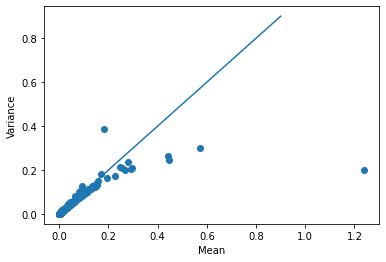

In [38]:
import matplotlib.pyplot as plt

diag=np.arange(0,1,0.1)
plt.scatter(means,variances)
plt.plot(diag,diag)
plt.xlabel('Mean')
plt.ylabel('Variance')

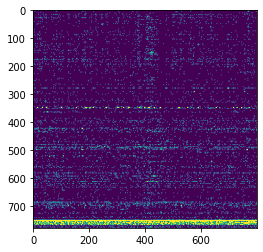

In [41]:
plt.imshow(spikes[:,200:],vmax=0.3,vmin=0)